<a href="https://colab.research.google.com/github/Terrencebosco/Build_week_2/blob/master/build_week_2_(working).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## cleaning a formatting test data set 

In [70]:
#### for data set1

# # read in data set 1
# url = 'https://raw.githubusercontent.com/Terrencebosco/Build_week_2/master/build_week_2_data_2.csv'

# df = pd.read_csv(url)

# # feature engineering

# # drop na
# df = df.dropna(axis=0)

# # new feature for car year
# df['Car_year'] = df['car'].str.slice(stop=4)

# # # # remove car year from car feature
# # df['Car'] = df['Car'].str[4:]

# # # get make of car feature
# # df['Make'] = df['Car'].str.split().str.get(0)

# # # remove make of car from 'car' feature
# # df['Car'] = df['Car'].str.split(n=1).str[1]

# # remove mini from "cooper" from 'Car' for consistancey
# df['Make'] = df['Make'].replace('MINI','MINI Cooper')

# # remove "cooper" from 'car' feature and add to 'Make' feature, for consistancy
# df['Car'] = df['Car'].mask(df['Car'].str.contains('Cooper'),df['Car'].str.replace('Cooper',''))

# # # change int color for consistancy
# df['Int_color'] = df['Int_color'].replace({
#     'Othe':'Other',
#     'Brow':'Brown',
#     'Silve':'Silver',
#     'Gree':'Green'
# })

# # # change ext color for consistancy
# df['Ext_color'] = df['Ext_color'].replace({
#     'Othe':'Other',
#     'Brow':'Brown',
#     'Silve':'Silver',
#     'Gree':'Green'
# })

In [71]:
# # make feature for the type model of car
# df['car_type'] = df['car'].str.split().str.get(0)
# df['car'] = df['car'].str.split(n=1).str[1]

# # remove mini from "cooper" from 'Car' for consistancey
# df['make'] = df['make'].replace('MINI','MINI Cooper')

# # remove "cooper" from 'car' feature and add to 'Make' feature, for consistancy
# df['car'] = df['car'].mask(df['car'].str.contains('Cooper'),df['car'].str.replace('Cooper',''))

# # chaneg transmission from multi type to binary
# df['transmission'] = np.where(df['transmission'].str.contains('automatic', case=False), 1 ,0)
# make new color feature


## Cleaning and formatting working data set 

In [72]:
# imports
!pip install category_encoders
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# read in data
url = 'https://raw.githubusercontent.com/Terrencebosco/Build_week_2/master/test_data_2'
df = pd.read_csv(url)

# remove rows that do not match format of columns (out of order when scraped)
columns_list = df.columns.to_list()
for column in columns_list:
    df = df[~df[column].str.contains('Stock:')]

# remove 'certified'
df['car'] = df['car'].mask(df['car'].str.contains('Certified'),df['car'].str.replace('Certified',''))

df['car'] = df['car'].mask(df['car'].str.contains('Mileage:'),df['car'].str.replace('Mileage:',''))

# remove spaces in front car names
df['car'] = df['car'].str.strip(' ')

# new feature for car year
df['car_year'] = df['car'].str.slice(stop=4)

# remove car year from car feature
df['car'] = df['car'].str[5:]

# # get make of car feature
df['make'] = df['car'].str.split().str.get(0)
# remove make of car from 'car' feature
df['car'] = df['car'].str.split(n=1).str[1]

## ext color
df['ext_color'] = df['ext_color'].str.strip('Exterior Color:')
## int color
df['int_color'] = df['int_color'].str.strip('Interior Color:')

# remove straggling rows with miss match formatting (see function at top)
columns_list = df.columns.to_list()
for column in columns_list:
    df = df[~df[column].str.contains('Interior Color')]

# remove straggling rows with miss match formatting (see function at top)
columns_list = df.columns.to_list()
for column in columns_list:
    df = df[~df[column].str.contains('VIN')]

# remove straggling rows with miss match formatting (see function at top)
columns_list = df.columns.to_list()
for column in columns_list:
    df = df[~df[column].str.contains(':')]

df['engine'] = df['engine'].str.strip('Gas')
df['engine'] = df['engine'].str.strip('Regular')
df['engine'] = df['engine'].str.strip('Unleaded ')
# df['engine'] = df['engine'].str.strip('-Cyl')
df['engine'] = df['engine'].str.strip('I4 ')

# create engine size feature
df[['size','engine']] = df['engine'].str.split(n=1, expand=True)
df['size'] = df['size'].str.strip('L')
df['size'] = df['size'].str.strip('-')

## has turbo
df['turbo'] = np.where(df['engine'].str.contains('turbo', case=False), 1, 0)

# chaneg transmission from multi type to binary (automatic = 1, not automatic = 0)
df['transmission'] = np.where(df['transmission'].str.contains('automatic', case=False), 1 ,0)

#sperate drivetrain into new columns for computation
df['rear_wheel_drive'] = np.where(df['drivetrain'].str.contains('RWD',case=False), 1, 0)
df['all_wheel_drive'] = np.where(df['drivetrain'].str.contains('4WD|4X4|AWD'), 1, 0)
df['front_wheel_drive'] = np.where(df['drivetrain'].str.contains('FWD|2WD', case=False), 1, 0)
df = df.drop(columns='drivetrain')

# drop missing values 
df.fillna(value=np.nan, inplace=True)
df.dropna(inplace=True)

# remove unwanted strings from price
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')

# remove unwanted strings from mileage
df['mileage'] = df['mileage'].replace('-- ',np.nan)
df['mileage'] = df['mileage'].str.replace(',', '')
df['mileage'] = df['mileage'].str.replace('miles', '')

# make feature for the type model of car
df['car_type'] = df['car'].str.split().str.get(0)
df['car'] = df['car'].str.split(n=1).str[1]


# color formatting
## replace car colors with known color 
df.loc[df['ext_color'].str.contains('Maroon'), 'ext_color'] = 'Red'
df.loc[df['ext_color'].str.contains('Magnetic'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Green'), 'ext_color'] = 'Green'
df.loc[df['ext_color'].str.contains('Gold'), 'ext_color'] = 'Gold'
df.loc[df['ext_color'].str.contains('Sea'), 'ext_color'] = 'Blue'
df.loc[df['ext_color'].str.contains('Brown'), 'ext_color'] = 'Brown'
df.loc[df['ext_color'].str.contains('Metal'), 'ext_color'] = 'Silver'
df.loc[df['ext_color'].str.contains('Cherry'), 'ext_color'] = 'Red'
df.loc[df['ext_color'].str.contains('Pea'), 'ext_color'] = 'Green'
df.loc[df['ext_color'].str.contains('Indigo'), 'ext_color'] = 'Blue'
df.loc[df['ext_color'].str.contains('Tan'), 'ext_color'] = 'Brown'
df.loc[df['ext_color'].str.contains('red'), 'ext_color'] = 'Red'
df.loc[df['ext_color'].str.contains('Titanium'), 'ext_color'] = 'Silver'
df.loc[df['ext_color'].str.contains('Yellow'), 'ext_color'] = 'Yellow'
df.loc[df['ext_color'].str.contains('Wh'), 'ext_color'] = 'White'
df.loc[df['ext_color'].str.contains('Silv'), 'ext_color'] = 'Silver'
df.loc[df['ext_color'].str.contains('Grey'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Red'), 'ext_color'] = 'Red'
df.loc[df['ext_color'].str.contains('White'), 'ext_color'] = 'White'
df.loc[df['ext_color'].str.contains('Black'), 'ext_color'] = 'Black'
df.loc[df['ext_color'].str.contains('Blu'), 'ext_color'] = 'Blue'
df.loc[df['ext_color'].str.contains('Graph'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Granite'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Powd'), 'ext_color'] = 'White'
df.loc[df['ext_color'].str.contains('Wh'), 'ext_color'] = 'White'
df.loc[df['ext_color'].str.contains('Gun'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Burgundy'), 'ext_color'] = 'Red'

## format known int car color
df.loc[df['int_color'].str.contains('Black'), 'int_color'] = 'Black'
df.loc[df['int_color'].str.contains('Gray'), 'int_color'] = 'Gray'
df.loc[df['int_color'].str.contains('Beig'), 'int_color'] = 'Beige'
df.loc[df['int_color'].str.contains('black'), 'int_color'] = 'Black'
df.loc[df['int_color'].str.contains('Blu'), 'int_color'] = 'Blue'
df.loc[df['int_color'].str.contains('BLACK'), 'int_color'] = 'Black'
df.loc[df['int_color'].str.contains('GRAY'), 'int_color'] = 'Gray'
df.loc[df['int_color'].str.contains('Grey'), 'int_color'] = 'Gray'
df.loc[df['int_color'].str.contains('Browns'), 'int_color'] = 'Brown'
df.loc[df['int_color'].str.contains('Brown'), 'int_color'] = 'Brown'
df.loc[df['int_color'].str.contains('Ta'), 'int_color'] = 'Brown'
df.loc[df['int_color'].str.contains('Medium Light S'), 'int_color'] = 'Gray'
df.loc[df['int_color'].str.contains('Ebony'), 'int_color'] = 'Brown'
df.loc[df['int_color'].str.contains('Ash'), 'int_color'] = 'Gray'

# get list of int colors i want
int_color =  df['int_color'].value_counts().head(5).index.to_list()
# chance all colors no known to 'other' (from list)
df.loc[~df['int_color'].isin(int_color), 'int_color'] = 'Other'

# get list of colors i want
car_color =  df['ext_color'].value_counts().head(10).index.to_list()
# chance all colors no known to 'other' (from list)
df.loc[~df['ext_color'].isin(car_color), 'ext_color'] = 'Other'

# remove missformated rows
drop_list = ['Turbocharged','/Electric','ntercooled','/Ethanol','ECOTEC','Cyl','V-6','V6']
for i in drop_list:
    df = df[~df['size'].str.contains(i)]

# change type for numeric features 
to_num_list = ['city_mpg', 'high_mpg', 'car_year','price', 'mileage', 'size']
for i in to_num_list:
    df[i] = pd.to_numeric(df[i])

# remove outliers
df = df[df['mileage']<=250000]

# re index data frame
df = df.reindex()

def replace_spaces_with_underscore_in_column_names_and_make_lowercasee(df):
  """
  Accepts a dataframe.
  Alters column names- replacing spaces with '_' and column names lowercase.
  Returns a dataframe.
  """
  labels = list(df.columns)
  for i in range(len(df.columns)):
    labels[i] = labels[i].replace(' ', '_')
    labels[i] = labels[i].lower()
  df.columns = labels
  return df
# Invokes the function
df = replace_spaces_with_underscore_in_column_names_and_make_lowercasee(df)

# shape
df.shape

(2119, 17)

In [73]:
## make csv for github 
# df.to_csv('clean_data_set_2_v2', index=False)

## EDA working data set 

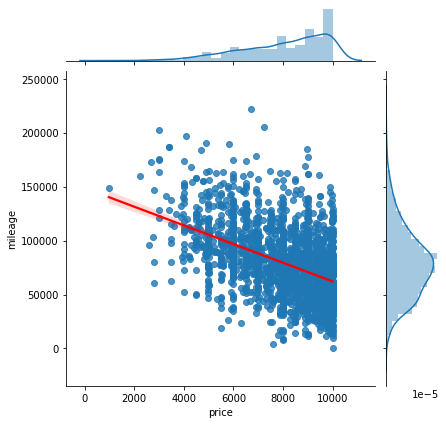

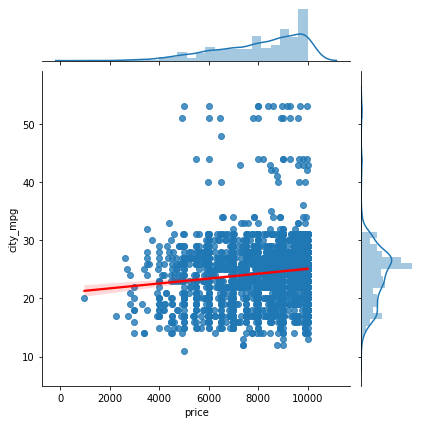

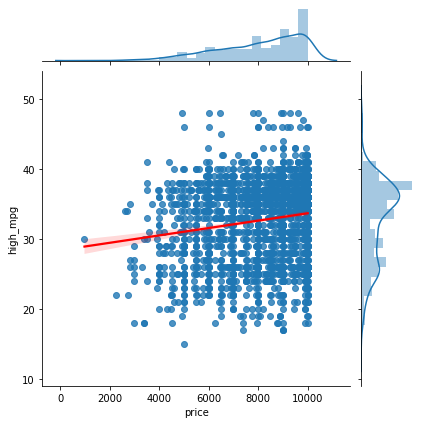

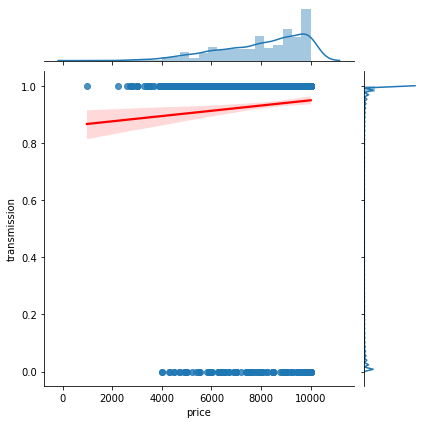

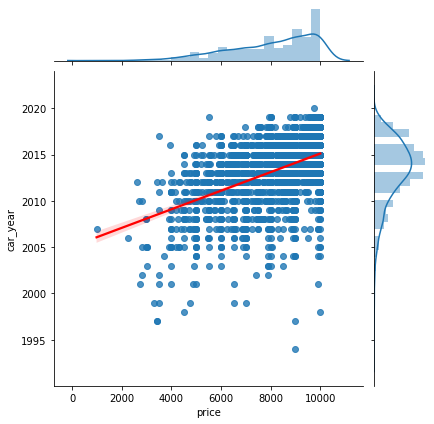

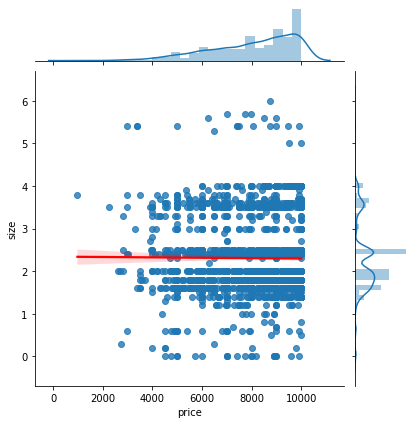

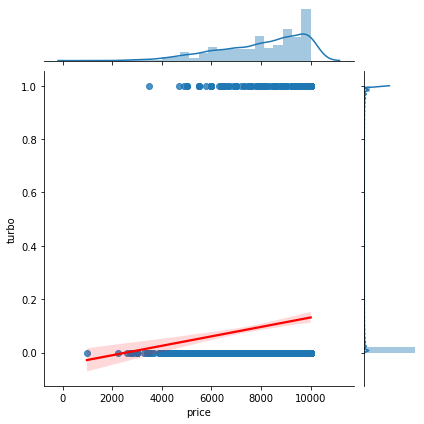

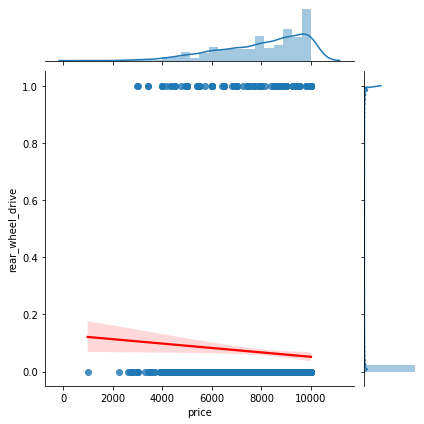

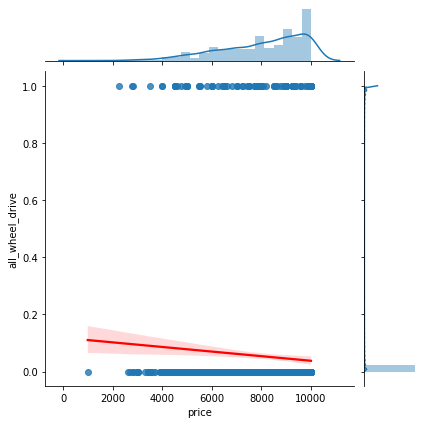

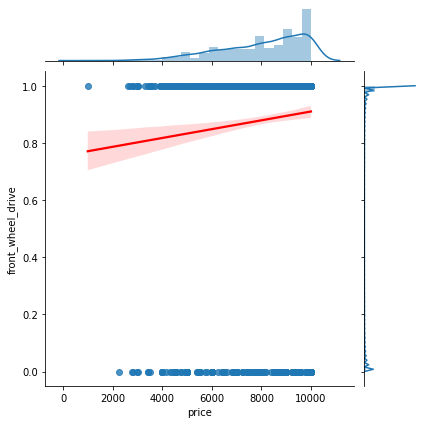

In [74]:
numeric_features_list = df.select_dtypes(exclude=object)
numeric_features_list = numeric_features_list.drop('price', axis=1)

for feature in numeric_features_list:
    sns.jointplot(x=target, y=feature, data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}});

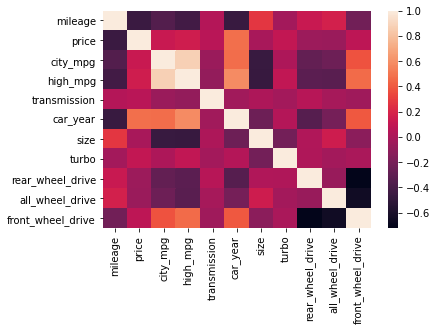

In [75]:
x_tab = df.corr()

sns.heatmap(x_tab)

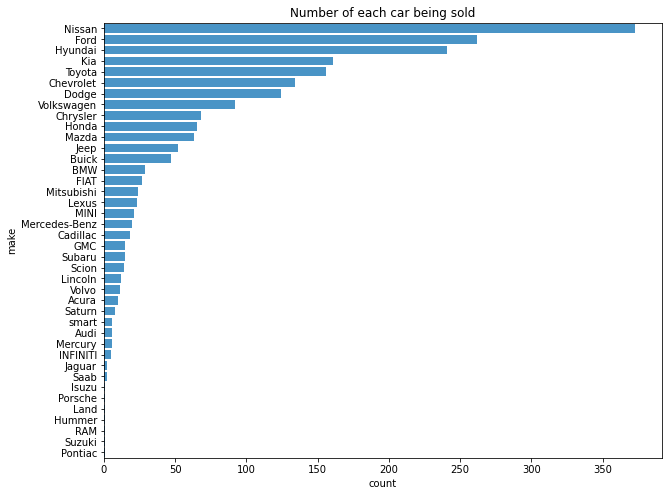

In [76]:
# plot number of cars by 'make'
ax = plt.figure(figsize=(10,8))

sns.countplot(data=df, y='make',
               order=df['make'].value_counts().sort_values(ascending=False).index,
              color='#3498db')

plt.title('Number of each car being sold');

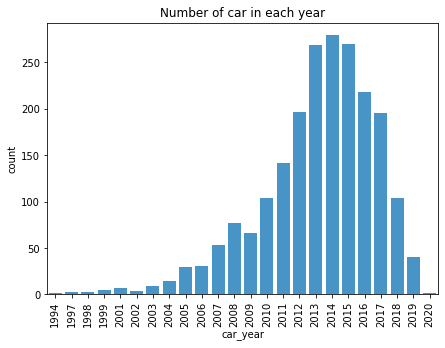

In [77]:
# plot number of cars by 'car_year'
ax = plt.figure(figsize=(7,5))
sns.countplot(df['car_year'], color='#3498db')

plt.title('Number of car in each year')
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',  
);

In [ ]:
# plot mean mileage
mileage_mean = df['mileage'].mean()
sns.distplot(df['mileage'])
plt.axvline(df['mileage'].mean(), color='red')
plt.title('Mean mileage')
print(f'{mileage_mean:,.0f} is the mean mileage')

we can see that there are several features that effect the target(Price) of the used car. 

1. mileage vs price.

the price of the car is negativly correlated with the price of the car. as the mileae goes up the price of the car will go down.


2. mpg vs price. 

the MPG of the car, city and highway, are both positivly correlated with the price of the ca. this may be do to the fact that the newer cars have better mpg and thus cost more. not nessisarily because of the mpg but because of the year of the car. we can see this relationship in the heat map. the year of the car is related to the mpg of the car.


3. year of car vs price. 

the year is positivly correlated to the price of the car. the newer cars generally cost more on resale

4. flex fuel, tubo, hybrid vs price.

flex fuel has almost no effect on the resale value of a car. on the other hand cars that have tubos, or are hybrids have a positvive relationship with a cars resale value.

## model selection working data set 

In [ ]:
# get base line prediction and measn absolute score

#. get mean
price_mean = df['price'].mean()

#. get prediction with mean
y_pred = [price_mean] * len(df['price'])

#. get base line score
baseline = mean_absolute_error(y_pred,df['price'])
                               
print(f'Baseline error of {baseline:.2f} if mean was used')

In [ ]:
# train, val test split @ 20% for test and val.
train, test = train_test_split(df, test_size=.2, random_state=42)
train, val = train_test_split(train, test_size=.2, random_state=42)

# get target and features
target = 'price'
features = df.drop(target, axis=1).columns.to_list()

# get feature matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# get target vectors
y_train = train[target]
y_val = val[target]
y_test = test[target]

# simple pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RandomForestRegressor(max_depth=25),
)

# simple prediction
pipeline.fit(X_train, y_train);
y_pred = pipeline.predict(X_val)
y_pred2 = pipeline.predict(X_train)
print('Simple random forest model:')
print('Test score',mean_absolute_error(y_train, y_pred2))
print('val score',mean_absolute_error(y_val, y_pred))

In [ ]:
# use only int. features
df = df[['price','mileage','city_mpg','high_mpg','car_year','size','turbo','rear_wheel_drive','all_wheel_drive','front_wheel_drive']]

# train, val test split @ 20% for test and val.
train, test = train_test_split(df, test_size=.2, random_state=42)
train, val = train_test_split(train, test_size=.2, random_state=42)

# get target and features
target = 'price'
features = df.drop(target, axis=1).columns.to_list()

# get feature matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# get target vectors
y_train = train[target]
y_val = val[target]
y_test = test[target]

print('Splits shape:', train.shape, val.shape, test.shape)
print('Feature matrix shape:', X_train.shape, X_val.shape, X_test.shape)
print('Target vector shape:', y_train.shape, y_val.shape, y_test.shape)

# use xgboost to predict 
model=xgb.XGBRegressor(random_state=1, n_estimators=1000, learning_rate=0.01)
model.fit(X_train, y_train)
print(mean_absolute_error(y_train, model.predict(X_train)))
print(mean_absolute_error(y_val, model.predict(X_val)))


In [ ]:
# implementing random search with a randomforestregression model

# train, val test split @ 20% for test and val.
train, test = train_test_split(df, test_size=.2, random_state=42)
train, val = train_test_split(train, test_size=.2, random_state=42)

# get target and features
target = 'price'
features = df.drop(target, axis=1).columns.to_list()

# get feature matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# get target vectors
y_train = train[target]
y_val = val[target]
y_test = test[target]

# check the shape
print('Splits shape:', train.shape, val.shape, test.shape)
print('Feature matrix shape:', X_train.shape, X_val.shape, X_test.shape)
print('Target vector shape:', y_train.shape, y_val.shape, y_test.shape)

# pipelinr
pipeline = make_pipeline(
     ce.OrdinalEncoder(),
     RandomForestRegressor(random_state=42)
)

# param to test
p_distributions = {
    'randomforestregressor__n_estimators':range(200,400),
    'randomforestregressor__min_samples_leaf':range(1,6),
    'randomforestregressor__min_samples_split':range(1,15),
    'randomforestregressor__max_depth':range(1,50)
}

# random search cv
search = RandomizedSearchCV(
    pipeline,
    param_distributions=p_distributions,
    n_iter = 100,
    cv=10,
    scoring='neg_mean_absolute_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

# fit
search.fit(X_train, y_train);

# get  val score
pipeline = search.best_estimator_
y_pred = pipeline.predict(X_val)

# check val score and the model used
print('\n',search.best_params_)
print('\n',-search.best_score_)
print('\n',mean_absolute_error(y_val, y_pred))

In [ ]:
# best param:  {'randomforestregressor__n_estimators': 240,
                # 'randomforestregressor__min_samples_split': 2,
                # 'randomforestregressor__min_samples_leaf': 1,
                # 'randomforestregressor__max_depth': 48}

# best score: 1025.6300169072258

# val error: 1031.535029498525

In [ ]:
search.best_params_

# {'randomforestregressor__n_estimators': 240,
#  'randomforestregressor__min_samples_split': 2,
#  'randomforestregressor__min_samples_leaf': 1,
#  'randomforestregressor__max_depth': 48}

In [ ]:
# train, val test split @ 20% for test and val.
train, test = train_test_split(df, test_size=.2, random_state=42)
train, val = train_test_split(train, test_size=.2, random_state=42)

# get target and features
target = 'price'
features = df.drop(target, axis=1).columns.to_list()

# get feature matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# get target vectors
y_train = train[target]
y_val = val[target]
y_test = test[target]

##################### test ###########################

# one hot encoding
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# scale encoded
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

# lasso prediction
lasso = linear_model.Lasso()
lasso.fit(X_train_encoded,y_train)
y_pred = lasso.predict(X_val_encoded)
mean_absolute_error(y_val, y_pred)